# 2019/01/14    - test campaign 1, day 1 (Monday)
##   3.2 Measure M1-M3-M1 once (repeated 5 times throughout the day)
##   3.3 Optimize M1 only figure (6+2 iterations)
Mirror Lab data package says it is 6+4 iterations. But '3-3c No Push' appears to have same data as '3-3b'

In [1]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
import glob

%matplotlib inline
plt.jet()

dateID = 190114

<Figure size 432x288 with 0 Axes>

## First we did two M1-M3-M1 measurements
## These were with additional quad forces
The additional forces were 350N on the inner quads (113, 313), and 200N on the outer quads (126, 326)
The dips were observed with the test runs on 2019/01/11. We decided these forces were needed.

The forces used here were calculated with 2014 polishing forces as the starting point,
but incorrect accounting of Mirror Lab hardware removed, and LSST hardware added.

3-2a ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190114_3-2a/190114 3-2 M1 set1-1 burst20 morph comp -FC.h5: Mon Jan 14 10:28:45 2019 
/Processed/190114_3-2a/190114 3-2 M1 set1-2 burst20 morph comp -FC.h5: Mon Jan 14 10:29:02 2019 
/Processed/190114_3-2a/190114 3-2 M1 set2-1 burst20 morph comp -FC.h5: Mon Jan 14 10:20:14 2019 
/Processed/190114_3-2a/190114 3-2 M1 set2-2 burst20 morph comp -FC.h5: Mon Jan 14 10:22:38 2019 
/Processed/190114_3-2a/190114 3-2 M3 set1-1 burst40 morph comp -FC.h5: Mon Jan 14 09:53:55 2019 
/Processed/190114_3-2a/190114 3-2 M3 set1-2 burst40 morph comp -FC.h5: Mon Jan 14 10:09:59 2019 
3-2b ------ irow = 0, icol = 1, -------Looking at following files ---------------
/Processed/190114_3-2b/190114 3-2 M1 set1-1 burst20 morph comp -FC.h5: Mon Jan 14 10:31:56 2019 
/Processed/190114_3-2b/190114 3-2 M1 set2-1 burst20 morph comp -FC.h5: Mon Jan 14 11:08:46 2019 
/Processed/190114_3-2b/190114 3-2 M3 set1-1 burst40 morph co

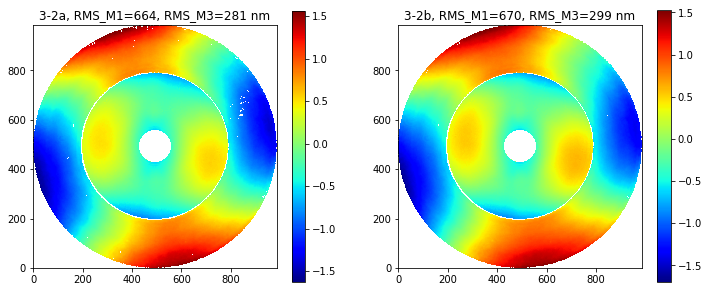

In [2]:
testID = '3-2'
fig, ax = plt.subplots(1,2,figsize=(12,5))
i = 0
for iter in 'ab':
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
        testID, iter, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 set*-* burst* morph comp -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M3 set*-* burst* morph comp -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID)))
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s%s, RMS_M1=%.0f, RMS_M3=%.0f nm'%(
        testID,iter, m1rms, m3rms) )

## we started optimizing M1M3 using M1 only

3-3 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190114_3-3a/190114 3-3 M1 bend0 burst40 morph -FC -CGH Rmod -FC.h5: Mon Jan 14 12:47:59 2019 
3-3 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190114_3-3a/190114 3-3 M1 bend1 burst40 morph -FC -CGH Rmod -FC.h5: Mon Jan 14 13:25:28 2019 
3-3 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190114_3-3a/190114 3-3 M1 bend2 burst40 morph -FC -CGH Rmod -FC.h5: Mon Jan 14 13:31:59 2019 
3-3 bend3 ------ irow = 1, icol = 0, -----------------------------
/Processed/190114_3-3a/190114 3-3 M1 bend3 burst40 morph -FC -CGH Rmod -FC.h5: Mon Jan 14 13:38:20 2019 
3-3 bend4 ------ irow = 1, icol = 1, -----------------------------
/Processed/190114_3-3a/190114 3-3 M1 bend4 burst40 morph -FC -CGH Rmod -FC.h5: Mon Jan 14 13:44:11 2019 
3-3 bend5 ------ irow = 1, icol = 2, -----------------------------
/Processed/190114_3-3a/190114 3-3 M1 bend5 burst40 morph -FC -CGH Rmod -F

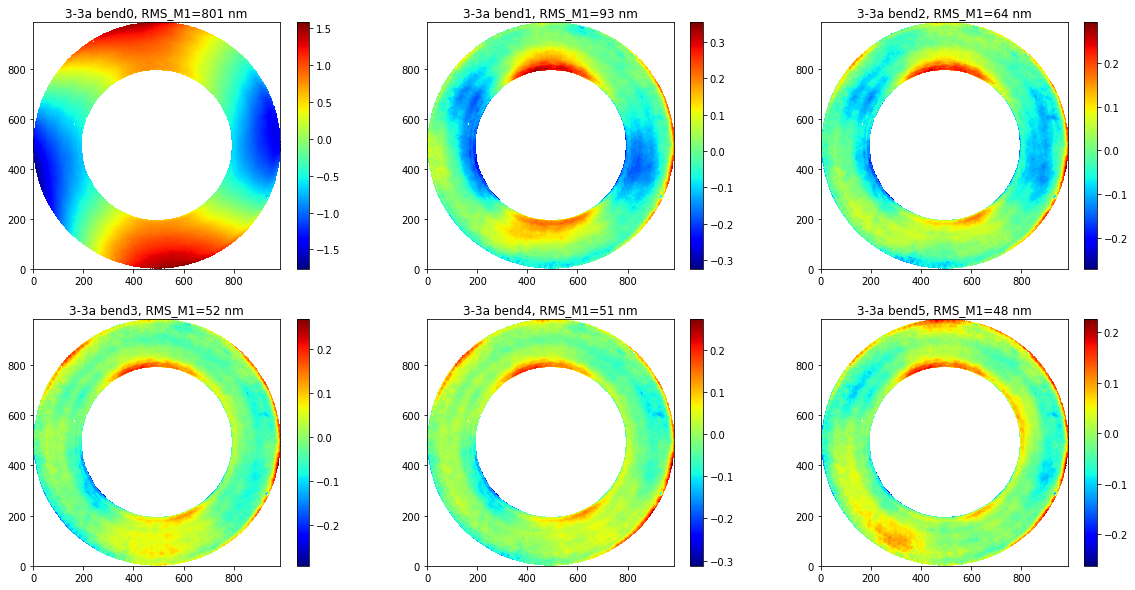

In [3]:
testID = '3-3'
fig, ax = plt.subplots(2,3,figsize=(20,10))
i = 0
iter = 'a'
for bend in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 bend%d*burst*morph -FC -CGH Rmod -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID, bend)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    img = ax[irow][icol].imshow(m1s, origin='lowerleft')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))

## Then we checked M1-M3-M1 again.
M3 looked bad. It looked a lot like bending mode 11. We tried to use bending mode 11 to correct it. But then we triggered the near neighbor check.
At that point we decided to start over without the additional quad forces, hoping that the dips may also go away.

3-2c ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190114_3-2c/190114 3-2 M1 set1-1 burst20 morph comp -FC.h5: Mon Jan 14 13:54:52 2019 
/Processed/190114_3-2c/190114 3-2 M1 set2-1 burst20 morph comp -FC.h5: Mon Jan 14 14:25:13 2019 
/Processed/190114_3-2c/190114 3-2 M3 set1-1 burst40 morph comp -FC.h5: Mon Jan 14 14:19:45 2019 


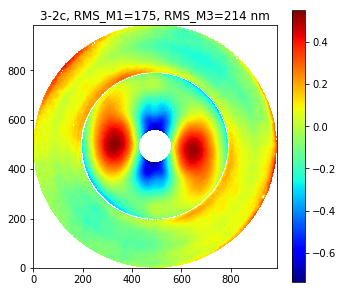

In [4]:
testID = '3-2'
fig, ax = plt.subplots(1,2,figsize=(12,5))
i = 0
for iter in 'c':
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
        testID, iter, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 set*-* burst* morph comp -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M3 set*-* burst* morph comp -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID)))
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s%s, RMS_M1=%.0f, RMS_M3=%.0f nm'%(
        testID,iter, m1rms, m3rms) )
fig.delaxes(ax.flatten()[1])

## We removed the additional quad forces and started over

3-2d ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190114_3-2d/190114 3-2 M1 set1-1 burst20 morph comp -FC.h5: Mon Jan 14 15:38:49 2019 
/Processed/190114_3-2d/190114 3-2 M1 set2-1 burst20 morph comp -FC.h5: Mon Jan 14 16:10:42 2019 
/Processed/190114_3-2d/190114 3-2 M3 set1-1 burst40 morph comp -FC.h5: Mon Jan 14 16:02:52 2019 


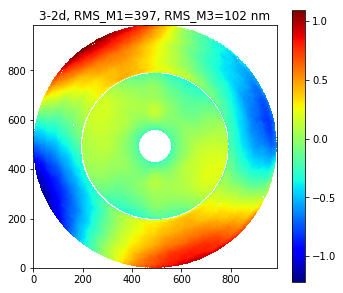

In [5]:
testID = '3-2'
fig, ax = plt.subplots(1,2,figsize=(12,5))
i = 0
for iter in 'd':
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
        testID, iter, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 set*-* burst* morph comp -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M3 set*-* burst* morph comp -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID)))
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s%s, RMS_M1=%.0f, RMS_M3=%.0f nm'%(
        testID,iter, m1rms, m3rms) )
fig.delaxes(ax.flatten()[1])

## We started another round of optimization

3-3 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190114_3-3b/190114 3-3 M1 bend0 burst40 morph -FC -CGH Rmod -FC.h5: Mon Jan 14 16:16:26 2019 
3-3 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190114_3-3b/190114 3-3 M1 bend1 burst40 morph -FC -CGH Rmod -FC.h5: Mon Jan 14 16:38:48 2019 
3-3 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190114_3-3b/190114 3-3 M1 bend2 burst40 morph -FC -CGH Rmod -FC.h5: Mon Jan 14 16:45:48 2019 


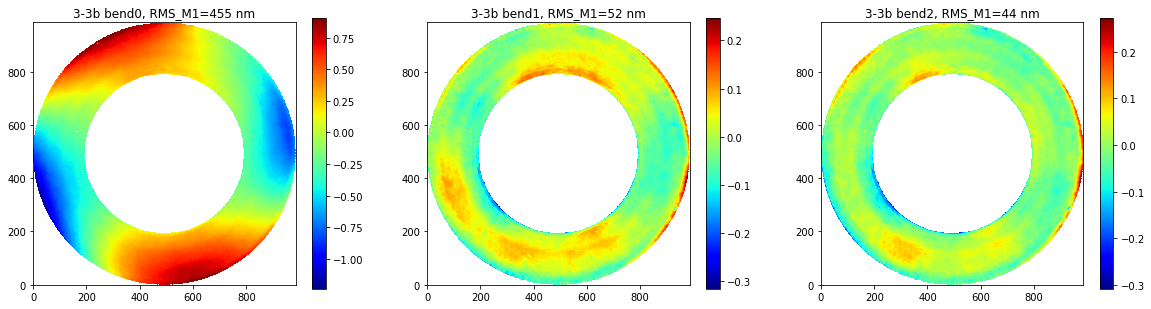

In [6]:
testID = '3-3'
fig, ax = plt.subplots(1,3,figsize=(20,5))
i = 0
iter = 'b'
for bend in range(3):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 bend%d*burst*morph -FC -CGH Rmod -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID, bend)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm

    img = ax[icol].imshow(m1s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))

## "3-3c No Push" seems to be same data as 3-3b. 
Not sure why Mirror Lab made an extra copy of the data

3-3 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190114_3-3c No Push/190114 3-3 M1 bend0 burst40 morph -FC -CGH Rmod -FC.h5: Mon Jan 14 16:16:26 2019 
3-3 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190114_3-3c No Push/190114 3-3 M1 bend1 burst40 morph -FC -CGH Rmod -FC.h5: Mon Jan 14 16:38:48 2019 
3-3 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190114_3-3c No Push/190114 3-3 M1 bend2 burst40 morph -FC -CGH Rmod -FC.h5: Mon Jan 14 16:45:48 2019 


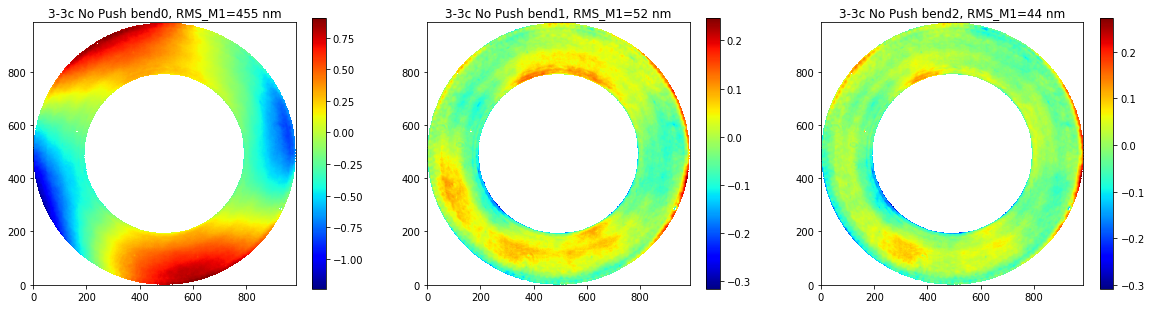

In [7]:
testID = '3-3'
fig, ax = plt.subplots(1,3,figsize=(20,5))
i = 0
iter = 'c No Push'
for bend in range(3):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 bend%d*burst*morph -FC -CGH Rmod -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID, bend)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    
    img = ax[icol].imshow(m1s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))

## Before we closed up for the day, we did another M1-M3-M1 measurement

3-2e ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190114_3-2e/190114 3-2 M1 set1-1 burst40 morph comp -FC.h5: Mon Jan 14 16:45:48 2019 
/Processed/190114_3-2e/190114 3-2 M1 set2-1 burst20 morph comp -FC.h5: Mon Jan 14 17:22:18 2019 
/Processed/190114_3-2e/190114 3-2 M3 set1-1 burst40 morph comp -FC.h5: Mon Jan 14 17:16:30 2019 


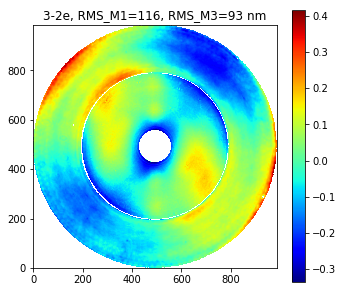

In [8]:
testID = '3-2'
fig, ax = plt.subplots(1,2,figsize=(12,5))
i = 0
for iter in 'e':
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
        testID, iter, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 set*-* burst* morph comp -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M3 set*-* burst* morph comp -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID)))
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s%s, RMS_M1=%.0f, RMS_M3=%.0f nm'%(
        testID,iter, m1rms, m3rms) )
    
fig.delaxes(ax.flatten()[1])

### The M1 surface in 3-2e is a bit different from M1 in 3-3b bend2. But the two have the same time stamp
Below we check the first M1 measurement only in 3-2e. It is still different from 3-2e.
Initially the Mirror Lab software did not record time stamps in processed data files. We had to go back to raw data files to get time stamps. Later they corrected the software, and went back to add time stamps to earlier processed files.
The Mirror Lab added time stamps to these h5 files later. There might have been some mess-ups in doing that.

3-2e ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190114_3-2e/190114 3-2 M1 set1-1 burst40 morph comp -FC.h5: Mon Jan 14 16:45:48 2019 
/Processed/190114_3-2e/190114 3-2 M3 set1-1 burst40 morph comp -FC.h5: Mon Jan 14 17:16:30 2019 


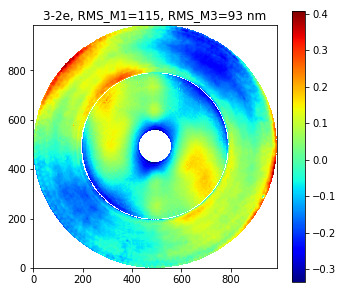

In [9]:
testID = '3-2'
fig, ax = plt.subplots(1,2,figsize=(12,5))
i = 0
for iter in 'e':
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
        testID, iter, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 set1-* burst* morph comp -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M3 set*-* burst* morph comp -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID)))
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s%s, RMS_M1=%.0f, RMS_M3=%.0f nm'%(
        testID,iter, m1rms, m3rms) )
    
fig.delaxes(ax.flatten()[1])